# ELEMENTOS RED NEURONAL ARTIFICIAL   

## Deep Learning y Redes Neuronales Artificiales
En general, hoy en día estamos manejando redes neuronales artificiales con muchísimas capas que, literalmente, están apiladas una encima de la otra; de aquí el concepto de **deep** (profundidad de la red), donde cada una de ellas está compuesta, a su vez, por muchísimas neuronas, cada una con sus parámetros que, a su vez, realizan una transformación simple de los datos que reciben de neuronas de la capa anterior para pasarlos a las de la capa posterior. La unión de todas permite descubrir patrones complejos en los datos de entrada.    

En la práctica, todos los algoritmos de Deep Learning son redes neuronales que comparten algunas propiedades básicas comunes, como que todas consisten en neuronas interconectadas que se organizan en capas.
En lo que difieren es en la arquitectura de la red (la forma en que las neuronas están organizadas en la red) y, a veces, en la forma en que se entrenan. Con eso en mente, enumeramos a continuación las principales clases de redes neuronales que presentaremos a lo largo del libro. Aunque no es una lista exhaustiva, representan la mayor parte de los algoritmos en uso hoy en día:   

- ***Perceptrón multicapa (MLP, del inglés Multi-layer perceptron)***: un tipo de red neuronal con capas densamente conectadas.
- ***Redes neuronales convolucionales (CNN del inglés Convolutional Neural Networks)***: una CNN es una red neuronal con varios tipos de capas especiales. Hoy en día este tipo de red está siendo muy usada por la industria en diferentes tipos de tarea, especialmente de visión por computador.
- ***Redes neuronales recurrentes (RNN del inglés Recurrent Neural Networks)***: este tipo de red tiene un estado interno (o memoria) que se crea con los datos de entrada ya vistos por la red. La salida de una RNN es una combinación de su estado interno y los datos de entrada. Al mismo tiempo, el estado interno cambia para incorporar datos recién entrados. Debido a estas propiedades, las redes neuronales recurrentes son buenas candidatas para tareas que funcionan en datos secuenciales, como texto o datos de series de tiempo.

## Estructura y elementos de una Red Neuronal Artificial    

<img src="img/DIAGRAMARNA.jpeg" width="800">

En la figura anterior se puede ver la estructura de la red, de donde extraemos los siguientes cuatro elementos:

- **Capas**: Es el elemento fundamental. Hay ciertas variantes, ciertos hiperparámetros como se suele expresar, para definir la red en lo relativo a las capas (número de capas, número de neuronas por capa, etc). Pero de cara a centrarnos en los elementos de la RN, nos fijaremos básicamente en el tipo de capa (o combinaciones de capa). 
- **Función de activación**: No aparece en el dibujo, pero es la función que rige la salida de las neuronas, especialmente relevante en las capas de salida. Dado que tiene relevancia en relación con el problema a tratar, será analizada detalladamente.
- **Función de pérdida**: La función que calcula cuán lejos está el resultado que produce la red del esperado, y que constituye la entrada fundamental para el aprendizaje.
- **Optimizador**: Que, en función de lo que obtiene como entrada de la función de pérdida, ‘decide’ en qué cuantía y dirección modificar los parámetros de las capas, típicamente sus pesos.   

Existen muchas más variantes y muchos más hiperparámetros a elegir para definir una red neuronal pero, inicialmente, nos referiremos a esos cuatro elementos a la hora de analizar los componentes de las redes neuronales.

## Capas de una Red Neuronal Artificial   
   
Como ya sabemos, la unidad mínima en una red neuronal sería, en teoría, la neurona, que conceptualmente se corresponde con una unidad que recibe unos datos de entrada (en la metáfora neuronal serían las salidas de otras neuronas) y proporciona un valor de salida.   
Realmente, a la hora de trabajar, más que con neuronas individuales, se trabaja con *capas*, que se corresponden intuitivamente con lo que la palabra capa indica, es decir, un *conjunto de neuronas en un mismo nivel*, que tienen características homogéneas entre sí y que se conectan con las neuronas de la capa precedente. Desde un punto de vista matemático, una capa se traduce en un módulo de procesamiento matemático que toma como entrada un tensor (que sería la salida de la capa anterior) y devuelve como salida otro tensor.

Entre los elementos que definen la tipología de una capa tenemos, por supuesto, el tipo de cálculos que aplican sus neuronas, pero también el patrón de conexión entre sí y, sobre todo, con la capa precedente.   
Disponemos, de entrada, de tres familias de capas, a saber:   
- **Densa (Perceptrón)**: En ellas todas las neuronas de una capa están conectadas a todas las neuronas de la capa anterior. Son capas que no asumen ningún tipo de estructura específica en las características de entrada. Se utilizan fundamentalmente en problemas de clasificación ya sea asumiendo la totalidad de las capas de la red o bien como fase final de clasificación en una red con capas de otros tipos.
- **Convolución**: capas que aplican transformaciones geométricas locales en espacios acotados de sus datos de entrada. Es decir, recorren sus datos de entrada aplicando sucesivamente pequeñas transformaciones a subconjuntos pequeños de ese espacio de entrada hasta finalizar el recorrido. Su comportamiento tiende a ir extrayendo, mediante la acción de capas sucesivas, características significativas del espacio de entrada. Suelen apoyarse en otros tipos de capas auxiliares como son las *capas de ‘pooling‘ (reducción del espacio de datos)* y *‘flatten‘ (conversión de tensores n-dimensionales en vectores)*.Su aplicación más típica es en tratamiento de imágenes y visión artificial, pero también su utilizan en procesamiento de sonidos, de textos u otro tipo de datos secuenciales.
- **Recurrente (RNR)**: Capa específicamente diseñada para el tratamiento de secuencias de entradas, típicamente temporales. Las capas recurrentes se denominan así porque su salida en un momento dado depende, no sólo de las entradas en ese momento, sino de su salida en el paso anterior. Son capas que, además, conservan un estado. Se utilizan en todo tipo de tratamiento de series temporales, siendo quizá lo más relevante, todo lo que tiene que ver con el procesamiento de texto y lenguaje o el análisis de sentimiento, pero también, por ejemplo, en la predicción del tiempo e incluso en redes generativas de texto. Existen algunas variantes de las que las más comunes son las dos siguientes:   

    - *Long Short-Term Memory (LSTM)*: En que la información recurrente se transmite no sólo al paso anterior sino a varios pasos anteriores.
    - *Gated Recurrent Unit (GRU)*: siguen la misma idea que las LSTM pero son computacionalmente más eficientes.

<img src="img/denseLayer.svg" width=800>
   
### Conv Layer (Convolutional Network)
<img src="img/convLayer.png" width=800>   

### RNN Layer (Recurrent Network)
<img src="img/RNNLayer.png" width=400>


## Función de Activación   

Como se recoge en la figura inferior (autor: Jordi Torres), una neurona artificial habitualmente divide su procesamiento en dos partes:   
- Por un lado, un tratamiento de las entradas (que puede ser, por ejemplo, una suma ponderada como se muestra en la figura o una convolución) y, 
- al resultado de esa primera función, aplicarle otra pequeña transformación para obtener el valor de salida de nuestra neurona. Esa segunda transformación, esa segunda función que en la figura se representa dentro de un rectángulo, es a lo que se denomina **función de activación** y es un segundo elemento de diseño relevante.   


<img src="img/neuronaArtificialJT.png" width=300>

Disponemos de variedad de funciones de activación, algunas de las cuales se muestran en la figura siguiente:    

<img src="img/activationFunction.png">



Analizamos, a continuación, algunas de las más habituales.

- **Función Lineal**: Se trata, quizá, del caso más simple, en que la función de activación básicamente, da una salida igual a la entrada, es decir, actúa como función identidad trasladando a su salida el resultado obtenido en la primera parte del procesamiento de la neurona (la suma ponderada de entradas, por ejemplo).
- **Función Rectified Linear Unit (‘ReLU’)**: Aunque el nombre pueda llamar a engaño, se trata en realidad de una función no lineal. En este caso, el valor de la función de activación es igual a su entrada mientras ésta sea mayor que cero (en ese caso sí actúa como lineal) pero, en caso contrario, el valor de activación es nulo. Su labor, en el fondo, no es más que eliminar valores negativos. Es difícil de explicar brevemente, pero este tipo de no linealidades aumenta las posibilidades de la red. En concreto, esta función, muy popular, da buenos resultados, por ejemplo, en redes de convolución y, por tanto, en tareas como visión artificial o reconocimiento de voz.    
Aparte de la ReLU, existen otras muchas funciones de activación que juegan con la linealidad y no linealidad de forma parecida, como pueden ser, por ejemplo, la *‘Leaky ReLU‘* en que para los valores negativos se proporciona una pendiente diferente (más tendida) que para los positivos o la *‘Exponential LU‘*.
- **Función Sigmoidea (logística)**: Se trata de una función continua y derivable (importante en los algoritmos de aprendizaje), con un rango entre 0 y 1 y generalmente cerca de esos extremos (0 ó 1). Esto la hace muy adecuada para problemas de clasificación. Por ejemplo, para una clasificación binaria, una única neurona de salida con esta función de activación sigmoidea tendería a dar muy bien el resultado (cercano a uno una categoría, cercana a cero la otra). También se utiliza en problemas de regresión con salida entre 0 y 1.
- **Función Tangente Hiperbólica**: Una función con una forma parecida a la sigmoidea pero que, en este caso, proporciona valores entre 1 y -1, es decir, admite valores negativos en la salida.
- **Función ‘softmax’ (función exponencial normalizada)**: Es una función de activación un poco particular, puesto que la salida no sólo depende de las entradas de la neurona sino también de la salida de las otras neuronas de la misma capa. Cuando se aplica una función de activación, la suma de las activaciones de la capa debe ser 1. Se utiliza en problemas de clasificación en múltiples categorías y etiquetas, en las que cada neurona de salida representa una categoría. La que tiene el valor más alto es la que representa con más probabilidad la categoría que corresponde a los datos mostrados en la entrada de la red.     

Existen más funciones de activación, claro, pero con éstas, inicialmente, se cubren los casos más habituales.   


Las funciones de activación desempeñan un papel importante a la hora de evitar el **sobreajuste** en los modelos de aprendizaje profundo. He aquí varias formas en las que contribuyen a este proceso:

### Introducción de la no linealidad y la complejidad   

Las funciones de activación introducen la no linealidad en el modelo, lo que permite a la red neuronal captar relaciones complejas y no lineales entre las variables de entrada y las de salida. De este modo, el modelo puede generalizarse mejor a datos desconocidos, reduciendo el riesgo de ajuste excesivo a ejemplos de entrenamiento específicos.   

### Regulación natural
  
Algunas funciones de activación, como ReLU y sus variantes, tienen propiedades que actúan de forma natural como reguladores para evitar la sobreadaptación:

- ReLU (Rectified Linear Unit) ignora los valores negativos, lo que puede hacer que el modelo sea más robusto al limitar la activación de las neuronas a patrones específicos presentes en los datos de entrenamiento.
- Leaky ReLU y ELU (Exponential Linear Unit) permiten una activación distinta de cero incluso para valores negativos, evitando la inactivación completa de las neuronas y permitiendo una mejor adaptación a las variaciones de los datos.
‍
### Evitar las "neuronas muertas"
Las "neuronas muertas", en las que una neurona deja de contribuir al aprendizaje porque nunca se activa, pueden provocar un ajuste excesivo al no captar correctamente los matices de los datos. Las variantes de ReLU, como Leaky ReLU y ELU, están diseñadas para evitarlo manteniendo cierta actividad incluso para valores de entrada negativos, mejorando así la capacidad de generalización del modelo.

### Estabilizar la convergencia
Unas funciones de activación bien elegidas pueden contribuir a una convergencia más estable del modelo durante el entrenamiento. Una convergencia más estable reduce la probabilidad de que el modelo sobreaprenda no sólo los datos de entrenamiento, sino también el ruido o los artefactos específicos del conjunto de entrenamiento.

### ***Selección basada en el problema y los datos***   

La elección de la función de activación debe adaptarse al tipo de problema y a las características de los datos:

- Para tareas en las que se requieren representaciones más complejas, pueden preferirse funciones como Tanh o ELU por su capacidad para mantener gradientes estables y modelar patrones más sutiles.
- Para las redes neuronales convolucionales utilizadas en Computer Vision, se suele elegir ReLU por su sencillez y eficacia.

## Función de pérdida   


La **función de pérdida (loss function)**, también denominada función objetivo, en esencia, nos dice, durante el proceso de entrenamiento de la red, lo lejos que está en un momento dado, lo que la red nos ofrece como salida y el resultado que nosotros consideramos que es el correcto o deseado. El valor de la función de pérdida será luego un dato de entrada en el algoritmo de aprendizaje.

Dado que los algoritmos de aprendizaje como el descenso de gradiente, calculan la derivada de la función de pérdida, ésta debe ser una función continua y derivable.    

Hay una gran variedad de funciones de pérdida posibles pero para nosotros vamos a seleccionar las siguientes:   


- **Error Cuadrático Medio (‘Mean Square Error‘, MSE)**: Una función muy conocida que calcula la distancia ‘geométrica’ al valor objetivo. Hablar de distancia geométrica es una forma de visualizarlo que nos orienta cuando pensamos en dos o tres dimensiones. Más allá de esas dimensiones, es sólo una forma de entenderlo. Además, decimos distancia, pero en realidad es la distancia elevada al cuadrado. Una variante de ésta seria la que, en lugar del cuadrado de la distancia, elige el valor absoluto (‘Absolute Error‘). MSE se puede usar, por ejemplo, en problemas de regresión a valores arbitrarios y con una última capa sin función de activación.
- **Entropía cruzada Categórica (‘Categorical Cross Entropy‘)**: es una medida de la distancia entre distribuciones de probabilidad. La entropía cruzada suele ser adecuada en modelos de redes cuya salida representa una probabilidad, como cuando hacemos una clasificación categórica con función de activación ‘softmax’. Se puede utilizar, por ejemplo, en problemas de clasificación categórica con una sola etiqueta de salida y precedida de una función de activación ‘Softmax’.
- **Entropía cruzada binaria (‘Binary Cross Entropy‘)**:  Una variante de la anterior pero en que tratamos con clasificación binaria y , por tanto, la función de activación sería una sigmoide.
- **Entropía Cruzada Categórica Dispersa (‘Sparse Categorical Cross Entropy‘)**: Una variante que se suele usar en el caso de trabajar con números enteros.   


Hay mucho más aparato matemático detrás de las funciones de pérdida, y más opciones posibles pero para nuestros objetivos en este módulo y en el curso, estás serán más que suficientes.

## Optimizadores   

Los optimizadores son una pieza nuclear del aprendizaje que, tomando como dato de entrada el valor de la función de pérdida, decide cómo modificar los pesos de la red para conseguir que el resultado se acerque, en cada paso, un poquito más al objetivo deseado.   

El algoritmo más ‘típico’ que podemos en este caso que el **descenso de gradiente (‘Gradient descent‘)** que, en el fondo, no es más, como intuición, que imaginar el perfil de la función de pérdida como una curva o superficie e ir ‘bajando’ en pequeños pasos por esa curva/superficie, en la dirección de máxima inclinación, hasta encontrar el ‘valle’, el punto más bajo, momento en que habríamos minimizado el error.

El descenso de gradiente *(‘Gradient Descent’, GD)* es un optimizador popular y la base de algunos otros. Vamos a ver, brevemente, una relación de otros optimizadores:   

- **BGD (‘Batch Gradient Descent‘)**: Es una variante del gradient descent en que, en cada iteración, tomamos el conjunto entero de datos de aprendizaje para calcular el valor del gradiente. Es un algoritmo relativamente sencillo de entender, pero de convergencia lenta.
- **SGD (‘Stochastic Gradient Descent‘)**: Es el extremo contrario, es decir, en lugar de usar todo el conjunto de datos para calcular el gradiente y actualizar pesos como hace BGD, en este caso en cada iteración utilizamos un único punto de datos con lo que tenemos una convergencia mucho más rápida. A cambio, tiende a presentar ciertas inestabilidades y fluctuaciones.
- **‘Mini-batch Gradient Descent‘**: Es el punto intermedio entre los dos anteriores. En este caso, en cada iteración elegimos un conjunto más o menos reducido de puntos de datos.
- **Nadam (‘Nesterov-accelerated adaptive moment stimation’)**: Este es un optimizador que utiliza el concepto de ‘momento‘. La idea intuitiva es acelerar más o menos el descenso de la curva de gradiente, según la pendiente de la misma, yendo más rápido en las direcciones en que la curva de la función de pérdida es más escarpada y más lento en las direcciones en que la curva presenta un perfil más suave. Y la forma de hacerlo matemáticamente es teniendo en cuenta, no sólo la pendiente actual, sino también la pendiente de las iteraciones anteriores con lo cual tenemos una cierta estimación de aceleración o deceleración.
- **Adagrad (‘ADAptive GRADient algorithm‘)**: Un método que introduce el aprendizaje adaptativo, en que el nivel de variación de los parámetros depende de estos. La idea geométrica es que, si en el descenso de gradiente avanzamos en la dirección de la mayor pendiente en cada momento, pudiendo esa pendiente no apuntar directamente al mínimo global, en Adagrad intentamos que la dirección de descenso, aunque no sea la máxima, sí apunte más en la dirección del mínimo. Presenta, eso si, el problema de una tasa de aprendizaje cada vez menor, que es lo que intentan resolver los siguientes optimizadores.
- **RMSprop (‘Root Mean Square prop‘)**: Utiliza una media móvil de los cuadrados del gradiente y normaliza ese valor empleando para ello las magnitudes recientes de los gradientes anteriores. La normalización se realiza, evidentemente, por que si no, el hecho de elevar al cuadrado hace que, caso de no normalizar, tengamos un valor de gradiente exageradamente alto (el cuadrado, en concreto).
- **Adam (‘ADAptive Moment stimation’)**: Viene a ser una combinación de Adagrad y RMSprop. Utiliza una media móvil exponencial de los gradientes para ajustar las tasas de aprendizaje. Es un algoritmo computacionalmente eficiente y que usa poca memoria. Y es uno de los optimizadores más populares hoy día.
- **Adadelta**: Una extensión de Adagrad más robusta que usa una ventana móvil de actualizaciones de gradientes.
- **Adamax**: Una variante algo sutil de Adam, en que en lugar de un momento de segundo orden, se utiliza un momento de orden infinito.   


Por detrás de los optimizadores, como puede intuirse, existe un cierto aparataje matemático y no es fácil describirlos de una forma realmente sencilla. Al igual que con los elementos anteriores, para este curso entendemos que la información proporcionada es la estrictamente necesaria.


Aunque existen multitud de adaptaciones, suele recomendarse:

La elección del algoritmo de optimización puede tener un impacto muy grande en el aprendizaje de los modelos, sobretodo en deep learning. Puede encontrarse una excelente descripción más detallada en el libro gratuito [Dive into Deep Learning](https://d2l.ai/chapter_optimization/index.html).    

También es recomendable consultar la API de [Keras](https://keras.io/api/optimizers/)



## Función de pérdida / Función de activación (Tabla resumen y aplicación)

- Dependiente del problema
 - Clasificación binaria: función activación ultima capa (sigmoide), función de perdida (binary_crossentropy)
 - Clasificacion multiclase: función activación ultima capa (softmax), función de perdida (categorical_crossentropy)
 - Regresión con valores arbitrarios: función activación ultima capa (none), función de perdida (mse)
 - Regresión valores 0 a 1: función activación ultima capa (sigmoide), función de perdida (mse o binary_crossentropy)    

 
| TIPO PROBLEMA | F. ACTIVACIÓN | F. PÉRDIDA | OPTIMIZADOR |
|---------------|---------------|------------|-------------|
| CLASIFICACION BINARIA | SIGMOIDE | BINARY CROSSENTROPY | ADAM/RMSPROP |
| CLASIFICACIÓN MULTICLASE| SOFTMAX | CATEGORICAL CROSSENTROPY| ADAM/RMSPROP |
| REGRESIÓN | RELU/TANH | MSE | ADAM/SGD |
| REGRESIÓN CON VALORES ARBITRARIOS | NINGUNA/RELU/TANH | MSE| ADAM/SGD |
| REGRESION CON VALORES 0 A 1 | SIGMOIDE | MSE / BINARY CROSSENTROPY| ADAM/RMSPROP |
| DETECCIÓN ANOMALÍAS | SIGMOIDE/RELU | MAE/BINARY CROSSENTROPY | ADAM/SGD |
| NLP | RELU/TANH | CATEGORICAL CROSSENTROPY | ADAM |
| VISION POR COMPUTADOR (CLAS.IMÁGENES) | RELU/SOFTMAX | CATEGORICAL CROSSENTROPY | ADAM |
| PREDICCIÓN SERIES TEMPORALES | RELU/TANH | MSE/MAE | ADAM/RMSPROP

 
 Información en Keras https://keras.io/losses/

## Criterios (extendidos) para la selección de la función de activación

 Las distintas funciones de activación de las redes neuronales tienen una gran variedad de aplicaciones prácticas, adaptadas a distintos tipos de problemas y arquitecturas de modelos. He aquí algunos ejemplos de aplicaciones prácticas para cada una de las principales funciones de activación:


### Sigmoide
- Clasificación binaria: se utiliza como última capa para producir probabilidades (entre 0 y 1) que indican la clase predictiva.
- Detección de objetos: Se puede utilizar para predecir la probabilidad de que un objeto esté presente en una región de interés.
- Reconocimiento de textos: se utiliza para estimar la probabilidad de aparición de una palabra o entidad específica.
‍

### Tanh(tangente hiperbólica)
- Redes neuronales tradicionales: suelen utilizarse en las capas ocultas para introducir la no linealidad y normalizar los valores de entrada entre -1 y 1.
- Reconocimiento del habla: se utiliza para clasificar fonemas y palabras en los sistemas de reconocimiento del habla.
- Tratamiento de señales: se aplica a la segmentación y clasificación de señales en medicina o telecomunicaciones.
‍

### ReLU(Unidad lineal rectificada)
- Redes neuronales convolucionales (CNNs) : Muy populares en CNNs de capa oculta para extraer características visuales en visión por computador.
- Detección de objetos: se utiliza para extraer características robustas y reducir el tiempo de cálculo en los modelos de detección de objetos.
- Análisis del lenguaje natural: se utiliza para la clasificación de textos y la modelización de sentimientos por su sencillez y rendimiento.
‍

### Leaky ReLU
- Redes neuronales profundas: se utilizan para paliar el problema de la "neurona muerta" asociado a ReLU, mejorando la solidez y estabilidad del aprendizaje.
- Generación de imágenes: se utiliza en los modelos de generación de imágenes para mantener una distribución más estable y diversa de las muestras generadas.
- Predicción de series temporales: se utiliza para modelizar tendencias y variaciones en datos de series temporales gracias a su capacidad para manejar entradas negativas.
‍

### ELU(Unidad lineal exponencial)
- Redes neuronales profundas: se utiliza como alternativa a ReLU para lograr una convergencia más rápida y estable al entrenar redes profundas.
- Procesamiento del lenguaje natural: Se aplica en modelos de procesamiento del lenguaje para el análisis semántico y la generación de textos debido a su capacidad para mantener gradientes estables.
- Predicción de series temporales: se utiliza para captar tendencias y relaciones no lineales en datos de series temporales con un rendimiento mejorado respecto a otras funciones.
‍

### Softmax
- Clasificación multiclase: se utiliza como capa final para normalizar la salida en probabilidades para varias clases, a menudo se utiliza en redes de clasificación.
- Modelos de recomendación: se utilizan para evaluar y clasificar las preferencias de los usuarios en los sistemas de recomendación.
- Análisis de sentimientos: Se utiliza para predecir y clasificar el sentimiento a partir de texto en línea, como reseñas de productos o comentarios sociales.
‍

### PReLU(Unidad lineal paramétrica rectificada)
- Redes neuronales profundas: se utilizan como alternativa a ReLU para paliar el problema de la "neurona muerta" permitiendo una ligera pendiente negativa para las entradas negativas, lo que mejora la robustez del modelo.
- Detección de objetos: se utiliza para extraer características robustas y mejorar la precisión de los modelos de detección de objetos en Computer Vision.
- Procesamiento del lenguaje natural: se utiliza en redes neuronales recurrentes para modelar dependencias a largo plazo y mejorar la precisión de las predicciones de texto.
‍

### Swish
- Redes neuronales profundas: Reconocido por su eficacia y rendimiento en redes profundas al amplificar las señales positivas y mejorar la no linealidad.
- Clasificación de imágenes: se utiliza para la clasificación de imágenes y el reconocimiento de objetos en redes neuronales convolucionales, mejorando a menudo el rendimiento respecto a ReLU.
- Modelización de series temporales: se aplica para captar relaciones complejas y no lineales en los datos de series temporales, lo que permite mejorar la predicción y la generalización.
‍

Al elegir adecuadamente entre estas funciones de activación en función del tipo de problema y de las características de los datos, se pueden optimizar el rendimiento de los modelos de Deep Learning minimizando el riesgo de sobreajuste y mejorando la capacidad de generalización a datos no vistos.

Debemos tener en cuenta que cada función de activación aporta ventajas específicas que pueden aprovecharse para satisfacer los diversos requisitos de las aplicaciones reales.

## Construcción de una Red Neuronal Sencilla con TENSORFLOW y KERAS

**TensorFlow** es un ecosistema propuesto por Google que se ha convertido en el entorno más popular para desarrolladores de aplicaciones que requieran Deep Learning. Desde su lanzamiento inicial en 2015 por parte del equipo de Google Brain, el paquete cuenta con decenas de millones de descargas y con alrededor de dos mil contribuidores.   

**Keras** ofrece una API cuya curva de aprendizaje es muy suave en comparación con otras. Los modelos de Deep Learning son complejos y, si se quieren programar a bajo nivel, requieren un conocimiento matemático de base importante para manejarse fácilmente. Por suerte para nosotros, Keras encapsula las sofisticadas matemáticas de tal manera que el desarrollador de una red neuronal solo necesita saber construir un modelo a partir de componentes preexistentes y acertar en su parametrización.   
La implementación de referencia de la librería de Keras fue desarrollada y es mantenida por François Chollet76, ingeniero de Google, y su código ha sido liberado bajo la licencia permisiva del MIT. Su documentación y especificaciones están disponibles en la página web oficial https://keras.io   

*tf.keras* es la implementación de TensorFlow de las especificaciones API de Keras. Esta es una API de alto nivel para construir y entrenar modelos que incluye soporte para funcionalidades específicas de TensorFlow, como eager execution o procesamiento de datos con tf.data.

### Importamos librerías necesarias

In [1]:
# IMPORTAMOS LIBRERIAS

import keras
from keras.models import Sequential  
from keras import layers
from keras.layers import Dense  
import numpy  

import warnings
warnings.filterwarnings("ignore")

numpy.random.seed(7)



2025-02-23 19:49:05.344581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740340145.401008   41867 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740340145.420952   41867 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-23 19:49:05.498909: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Cargamos dataset "Pima Indians Diabetes"

In [2]:
dataset = numpy.loadtxt("datasets/pima-indians-diabetes.csv", delimiter=",")  
X = dataset[:,0:8]  
Y = dataset[:,8]

In [3]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


### Creamos modelo de Red Neuronal (formato antiguo vs. formato nuevo)

In [4]:
model = Sequential()  
model.add(Dense(12, input_dim=8, activation='relu'))  
model.add(Dense(8, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

2025-02-23 19:49:19.511778: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')    
])

### Compilamos el modelo RN

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Entrenamos el modelo RN

In [7]:
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6356 - loss: 10.7993
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4793 - loss: 2.5233
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5512 - loss: 1.8425
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6141 - loss: 1.0790
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6246 - loss: 1.0090
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6298 - loss: 0.8173
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6376 - loss: 0.7838
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6431 - loss: 0.7494
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6416 - loss: 0.7750
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6924 - loss: 0.6980
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6268 - loss: 0.7715
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy

In [8]:
model2.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4237 - loss: 6.3352
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5900 - loss: 1.0511
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6389 - loss: 0.7514
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6568 - loss: 0.6858
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6702 - loss: 0.6690
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6314 - loss: 0.6956
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6472 - loss: 0.6895
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6505 - loss: 0.6711
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6384 - loss: 0.6734
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6537 - loss: 0.6582
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6107 - loss: 0.6772
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [5]:
# import importlib
# importlib.reload(utilsRNA) 

import utilsRNA as ut

In [6]:

ut.compile_model(model, 'adam', 'binary_crossentropy', 'accuracy')
history = ut.fit_model(model, X, Y, 150,100,10)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4890 - loss: 11.0380 - val_accuracy: 0.6200 - val_loss: 3.7199
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6586 - loss: 2.8439 - val_accuracy: 0.6333 - val_loss: 3.1061
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6629 - loss: 2.5043 - val_accuracy: 0.6333 - val_loss: 2.3551
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6461 - loss: 1.8159 - val_accuracy: 0.6000 - val_loss: 1.7092
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6353 - loss: 1.5580 - val_accuracy: 0.6267 - val_loss: 1.2515
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6203 - loss: 1.2462 - val_accuracy: 0.6667 - val_loss: 1.0692
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6513 - loss: 1.0737 - val_accuracy: 0.6400 - val_loss: 0.9730
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6474 - loss: 0.9858 - val_accuracy: 0.5733 - 

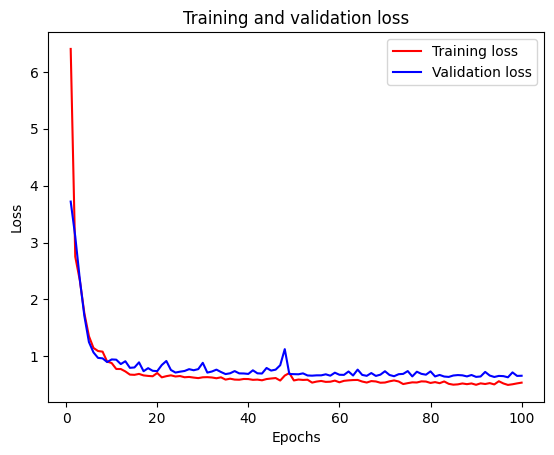

In [7]:
ut.plot_loss(history,'accuracy')

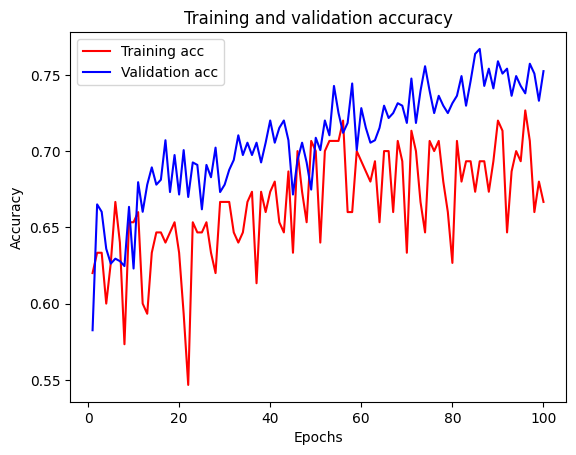

In [8]:
ut.plot_accuracy(history,'accuracy')

### Evaluamos el modelo

In [9]:
scores = model.evaluate(X, Y)  
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7023 - loss: 0.5931  

compile_metrics: 73.96%


In [36]:
scores = model2.evaluate(X, Y)  
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7483 - loss: 0.5156

compile_metrics: 76.82%


### Realizamos predicciones

In [10]:
# Predicciones 
predictions = model.predict(X)  
rounded = [round(x[0]) for x in predictions]  
print(rounded)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [37]:
# Predicciones 
predictions = model2.predict(X)  
rounded = [round(x[0]) for x in predictions]  
print(rounded)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 

## Construcción de una Red Neuronal Sencilla con PYTORCH

**PyTorch** es una librería de Python para deep learning creada y publicada por Facebook.
Además de PyTorch, también existe la librería *torchvision* que se utiliza habitualmente junto con PyTorch. Proporciona multitud de funciones útiles para proyectos de visión por computador.   
Para instalar Pytorch sistema, a través de *pip*, ejecutaremos la siguiente instrucción:   

***pip install torch torchvision***

### Importamos librerías necesarias

In [4]:
import numpy as np
import torch 




In [6]:
import torch.nn as nn
import torch.optim as optim

In [8]:
dataset = np.loadtxt('./datasets/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

Definimos la arquitectura de la RN

In [9]:
model = nn.Sequential(          # Sequential es una pila de capas
    nn.Linear(8, 12),           # Capa lineal de 8 neuronas a 12. Equivalente a la capa Dense de Keras
    nn.ReLU(),                  # Función de activación ReLU
    nn.Linear(12, 8),           # Capa lineal de 12 neuronas a 8
    nn.ReLU(),                  # Función de activación ReLU
    nn.Linear(8, 1),            # Capa lineal de 8 neuronas a 1
    nn.Sigmoid()                # Función de activación Sigmoid. Se usa esta función de activación porque es un problema de clasificación binaria.
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


Definimos hiperparámetros

In [10]:

loss_fn = nn.BCELoss() # binary cross-entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

Bucle de entrenamiento

In [11]:
n_epochs = 100
batch_size = 10
for epoch in range(n_epochs):               # bucle de entrenamiento en base al número de épocas
    for i in range(0, len(X), batch_size):  # bucle de entrenamiento en base al tamaño del batch
        Xbatch = X[i:i+batch_size]          # seleccionamos el batch
        y_pred = model(Xbatch)              # hacemos la predicción
        ybatch = y[i:i+batch_size]          # seleccionamos las etiquetas
        loss = loss_fn(y_pred, ybatch)      # calculamos la pérdida
        optimizer.zero_grad()               # ponemos a cero los gradientes
        loss.backward()                     # retropropagamos
        optimizer.step()                    # actualizamos los pesos
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.6162008047103882
Finished epoch 1, latest loss 0.5635843276977539
Finished epoch 2, latest loss 0.5501697063446045
Finished epoch 3, latest loss 0.5148082971572876
Finished epoch 4, latest loss 0.4750096797943115
Finished epoch 5, latest loss 0.4536030888557434
Finished epoch 6, latest loss 0.43718287348747253
Finished epoch 7, latest loss 0.42857271432876587
Finished epoch 8, latest loss 0.4182940721511841
Finished epoch 9, latest loss 0.4139865040779114
Finished epoch 10, latest loss 0.4088194668292999
Finished epoch 11, latest loss 0.407901793718338
Finished epoch 12, latest loss 0.40670260787010193
Finished epoch 13, latest loss 0.4067077338695526
Finished epoch 14, latest loss 0.40578359365463257
Finished epoch 15, latest loss 0.4048696756362915
Finished epoch 16, latest loss 0.41114187240600586
Finished epoch 17, latest loss 0.4124568700790405
Finished epoch 18, latest loss 0.4128149747848511
Finished epoch 19, latest loss 0.4155055582523346
Finish

### Inferencia (predicción)   

In [12]:
i = 5
X_sample = X[i:i+1]             # seleccionamos una muestra
model.eval()                    # ponemos el modelo en modo evaluación
with torch.no_grad():           # deshabilitamos el cálculo de gradientes
    y_pred = model(X_sample)    # hacemos la predicción
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2464])



Algunos modelos se comportarán de forma diferente entre el entrenamiento y la inferencia. 
- La línea de **model.eval()** es para señalar al modelo que la intención es ejecutar el modelo para la inferencia. 
- La línea de **torch.no_grad()** es para crear un contexto para ejecutar el modelo, de tal forma que PyTorch sepa que calcular el gradiente no es necesario. Esto puede consumir menos recursos.   

Así es también como se puede evaluar el modelo. El modelo produce un valor sigmoide, que está entre 0 y 1. Se puede interpretar el valor redondeando este al entero más cercano (es decir, la etiqueta booleana). Comparando la frecuencia con la que la predicción tras el redondeo coincide con el objetivo, se puede asignar un porcentaje de precisión al modelo, como se ve a continuación:

In [13]:
model.eval()                # ponemos el modelo en modo evaluación
with torch.no_grad():       # deshabilitamos el cálculo de gradientes
    y_pred = model(X)       # hacemos la predicción

In [14]:
accuracy = (y_pred.round() == y).float().mean() # Se redondea y_pred para que sea un valor 0 o 1
print(f"Accuracy:  {accuracy}")

Accuracy:  0.7708333134651184


## EJERCICIOS

Datasets para realizar ejercicios de clasificacion con RNA's:   

- ABALONE --> https://archive.ics.uci.edu/dataset/1/abalone  (Datos sobre conchas/caracolas marinas)
- TITANIC --> https://storage.googleapis.com/tf-datasets/titanic/train.csv

